# Lab 5 - Color Images

## Sophie Clark

There were three different observing nights for this lab, so this code will be split up to separately analyze the data from each observing night, seeing as each night had a different CCD and different temperature, thus requiring its own set of darks and flats.

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import visualization
import pylab as pl

### Observing Night 1: 2/2/2022

For this night, I will analyze the data for M1, the Crab Nebula

In [2]:
# Dark master image and noise
m1_dark_file_list = glob.glob("lab4_dark_0202_30s*FIT")
m1_dark_timeseries = np.array([fits.getdata(fn) for fn in m1_dark_file_list])
m1_median_dark = np.median(m1_dark_timeseries, axis=0)
m1_dark_std = m1_dark_timeseries.std(axis=0, ddof=1)
m1_mean_dark_noise = np.mean(m1_dark_std)
print("The mean dark noise across all the darks is", m1_mean_dark_noise)

The mean dark noise across all the darks is 9.78275772245334


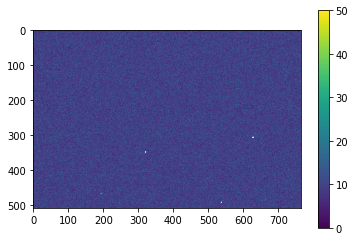

In [3]:
pl.imshow(m1_dark_std, vmin=0, vmax=50)
pl.colorbar()

In [4]:
# M1 Image Files
m1_B_file_list = glob.glob("lab4_m1_0202_B*FIT")
m1_V_file_list = glob.glob("lab4_m1_0202_V*FIT")
m1_I_file_list = glob.glob("lab4_m1_0202_I*FIT")

In [5]:
m1_B_data = np.array([fits.getdata(fn) for fn in m1_B_file_list])
m1_V_data = np.array([fits.getdata(fn) for fn in m1_V_file_list])
m1_I_data = np.array([fits.getdata(fn) for fn in m1_I_file_list])

In [6]:
m1_B_nodark = m1_B_data - m1_median_dark
m1_V_nodark = m1_V_data - m1_median_dark
m1_I_nodark = m1_I_data - m1_median_dark

In [7]:
# Flat Files
m1_flatB = glob.glob("lab4_flatB*FIT")
m1_flatV = glob.glob("lab4_flatV*FIT")
m1_flatI = glob.glob("lab4_flatI*FIT")

In [8]:
m1_flatB_data = np.array([fits.getdata(fn) for fn in m1_flatB])
m1_flatV_data = np.array([fits.getdata(fn) for fn in m1_flatV])
m1_flatI_data = np.array([fits.getdata(fn) for fn in m1_flatI])

We take the mean of the flats because unlike the darks, these images were taken in variable lighting, and thus we must account for possible continuous increases or decreases in brightness. 

In [9]:
m1_flatB_mean = m1_flatB_data.mean()
m1_flatV_mean = m1_flatV_data.mean()
m1_flatI_mean = m1_flatI_data.mean()

In [10]:
m1_flatB_mean_darksub = m1_flatB_mean - m1_median_dark
m1_flatV_mean_darksub = m1_flatV_mean - m1_median_dark
m1_flatI_mean_darksub = m1_flatI_mean - m1_median_dark

In [11]:
m1_b_uncertainty_image = m1_flatB_data.std(axis=0, ddof=1) + m1_dark_std
m1_v_uncertainty_image = m1_flatV_data.std(axis=0, ddof=1) + m1_dark_std
m1_i_uncertainty_image = m1_flatI_data.std(axis=0, ddof=1) + m1_dark_std

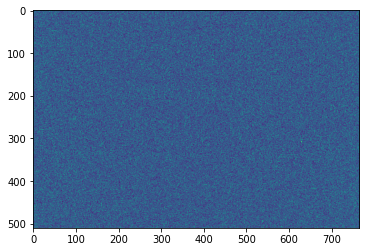

In [12]:
pl.imshow(m1_b_uncertainty_image, vmax=500)

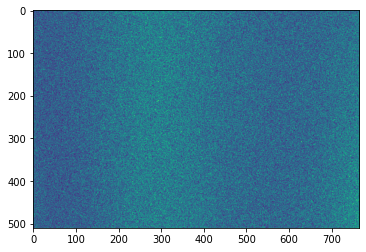

In [13]:
pl.imshow(m1_v_uncertainty_image, vmax=600)

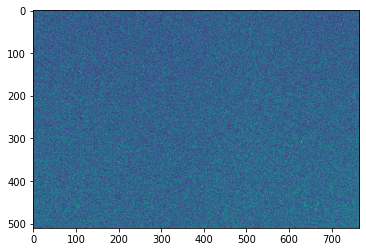

In [14]:
pl.imshow(m1_i_uncertainty_image, vmax=500)

In [15]:
# Normalizing flats
m1_flatB_mean_darksub_norm = m1_flatB_mean_darksub / m1_flatB_mean_darksub.mean()
m1_flatV_mean_darksub_norm = m1_flatV_mean_darksub / m1_flatV_mean_darksub.mean()
m1_flatI_mean_darksub_norm = m1_flatI_mean_darksub / m1_flatI_mean_darksub.mean()

In [16]:
m1_flatB_noise = m1_flatB_mean_darksub_norm.std(axis=0, ddof=1)
m1_flatV_noise = m1_flatV_mean_darksub_norm.std(axis=0, ddof=1)
m1_flatI_noise = m1_flatI_mean_darksub_norm.std(axis=0, ddof=1)

In [17]:
# Saving final flats to new FITS files
#hdu = fits.PrimaryHDU(m1_flatB_mean_darksub_norm)
#hdu.writeto('m1_flatB_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m1_flatV_mean_darksub_norm)
#hdu.writeto('m1_flatV_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m1_flatI_mean_darksub_norm)
#hdu.writeto('m1_flatI_mean_darksub_norm.FIT')

# DO NOT RUN MORE THAN ONCE!!!!!!!!!

In [18]:
m1_flat_B_darksub_biassub = [im / m1_flatB_mean_darksub_norm for im in m1_B_nodark]
m1_flat_V_darksub_biassub = [im / m1_flatV_mean_darksub_norm for im in m1_V_nodark]
m1_flat_I_darksub_biassub = [im / m1_flatI_mean_darksub_norm for im in m1_I_nodark]

In [19]:
#error propagation
m1_b_uncertainty_percent = m1_b_uncertainty_image / m1_b_uncertainty_image.mean()
m1_v_uncertainty_percent = m1_v_uncertainty_image / m1_v_uncertainty_image.mean()
m1_i_uncertainty_percent = m1_i_uncertainty_image / m1_i_uncertainty_image.mean()

m1_flat_B_uncertainty_percent = np.std(m1_flatB_mean_darksub_norm) / np.mean(m1_flatB_mean_darksub_norm)
m1_flat_V_uncertainty_percent = np.std(m1_flatB_mean_darksub_norm) / np.mean(m1_flatB_mean_darksub_norm)
m1_flat_I_uncertainty_percent = np.std(m1_flatB_mean_darksub_norm) / np.mean(m1_flatB_mean_darksub_norm)

m1_b_flatdiv_uncertainty_percent = m1_b_uncertainty_percent + m1_flat_B_uncertainty_percent
m1_v_flatdiv_uncertainty_percent = m1_v_uncertainty_percent + m1_flat_V_uncertainty_percent
m1_i_flatdiv_uncertainty_percent = m1_i_uncertainty_percent + m1_flat_I_uncertainty_percent

m1_b_flatdiv_uncertainty = m1_b_flatdiv_uncertainty_percent * np.mean(m1_flat_B_darksub_biassub)
m1_v_flatdiv_uncertainty = m1_v_flatdiv_uncertainty_percent * np.mean(m1_flat_V_darksub_biassub)
m1_i_flatdiv_uncertainty = m1_i_flatdiv_uncertainty_percent * np.mean(m1_flat_I_darksub_biassub)

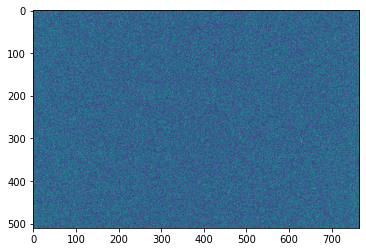

In [20]:
pl.imshow(m1_b_flatdiv_uncertainty, vmax=100)

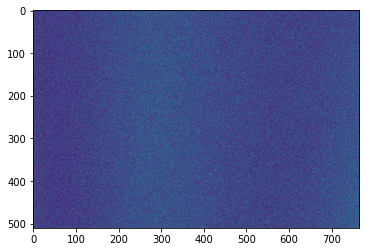

In [21]:
pl.imshow(m1_v_flatdiv_uncertainty, vmax=400)

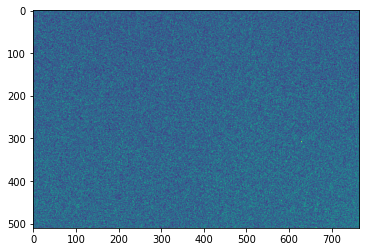

In [22]:
pl.imshow(m1_i_flatdiv_uncertainty, vmax=100)

In [23]:
processed_B_median_combined_images = np.median(m1_flat_B_darksub_biassub, axis=0)
processed_V_median_combined_images = np.median(m1_flat_V_darksub_biassub, axis=0)
processed_I_median_combined_images = np.median(m1_flat_I_darksub_biassub, axis=0)

Text(0.5, 1.0, 'Median Stack')

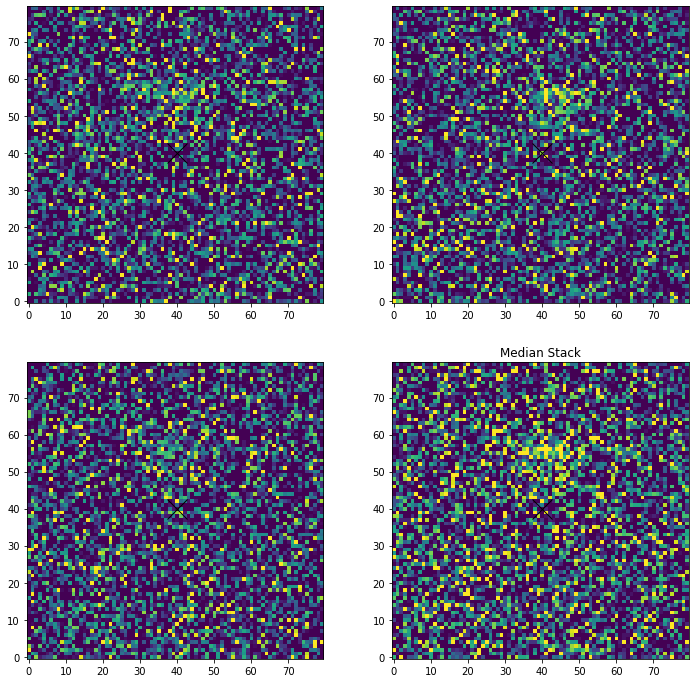

In [24]:
# B images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m1_flat_B_darksub_biassub[ii][20:100, 600:680], origin='lower', vmax=60, vmin=30)
    ax.plot(40, 40, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_B_median_combined_images[20:100, 600:680], origin='lower', vmax=50, vmin=30)
ax.plot(40, 40, 'kx', markersize=20)
ax.set_title("Median Stack")

In [25]:
bim0 = np.roll(np.roll(m1_flat_B_darksub_biassub[0], -15, axis=0), 0, axis=1)
bim1 = np.roll(np.roll(m1_flat_B_darksub_biassub[1], -15, axis=0), -5, axis=1)
bim2 = np.roll(np.roll(m1_flat_B_darksub_biassub[2], -15, axis=0), 0, axis=1)
b_rolled_images = [bim0,bim1,bim2]
b_rolled_median = np.median(b_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

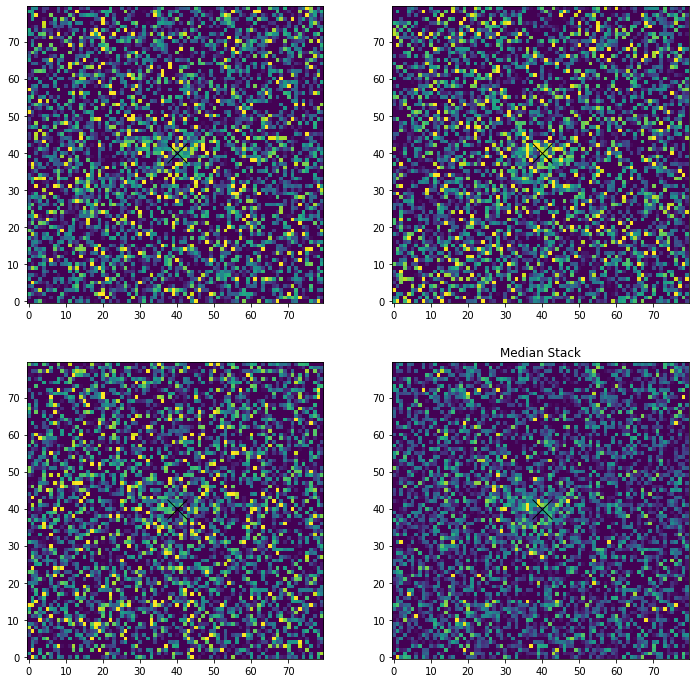

In [26]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(b_rolled_images[ii][20:100, 600:680], origin='lower', vmax=60, vmin=30)
    ax.plot(40, 40, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(b_rolled_median[20:100, 600:680], origin='lower', vmax=60, vmin=30)
ax.plot(40, 40, 'kx', markersize=20)
ax.set_title("Median Stack")

Text(0.5, 1.0, 'Median Stack')

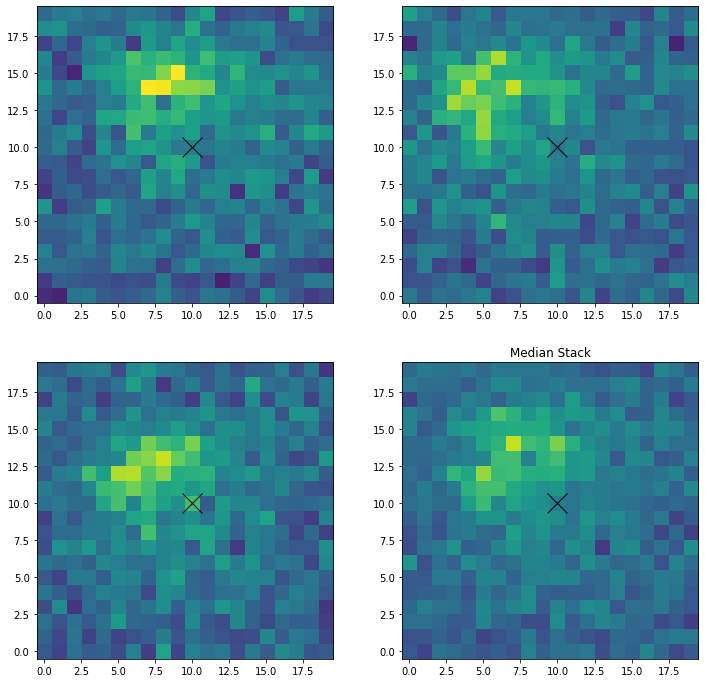

In [27]:
# V images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m1_flat_V_darksub_biassub[ii][60:80, 630:650], origin='lower', vmax=200, vmin=30)
    ax.plot(10, 10, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_V_median_combined_images[60:80, 630:650], origin='lower', vmax=200, vmin=30)
ax.plot(10, 10, 'kx', markersize=20)
ax.set_title("Median Stack")

In [28]:
vim0 = np.roll(np.roll(m1_flat_V_darksub_biassub[0], -4, axis=0), 1, axis=1)
vim1 = np.roll(np.roll(m1_flat_V_darksub_biassub[1], -4, axis=0), 5, axis=1)
vim2 = np.roll(np.roll(m1_flat_V_darksub_biassub[2], -2, axis=0), 3, axis=1)
v_rolled_images = [vim0,vim1,vim2]
v_rolled_median = np.median(v_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

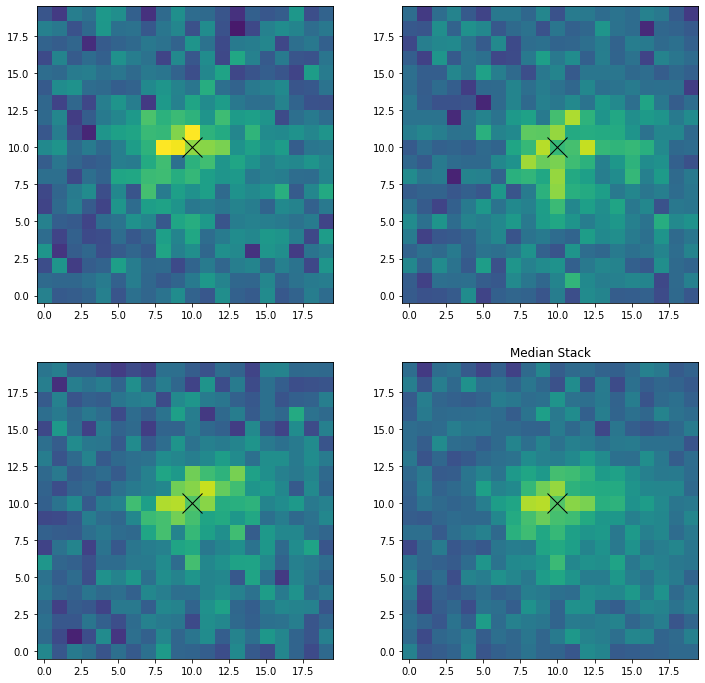

In [29]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(v_rolled_images[ii][60:80, 630:650], origin='lower', vmax=200, vmin=30)
    ax.plot(10, 10, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(v_rolled_median[60:80, 630:650], origin='lower', vmax=200, vmin=30)
ax.plot(10, 10, 'kx', markersize=20)
ax.set_title("Median Stack")

Text(0.5, 1.0, 'Median Stack')

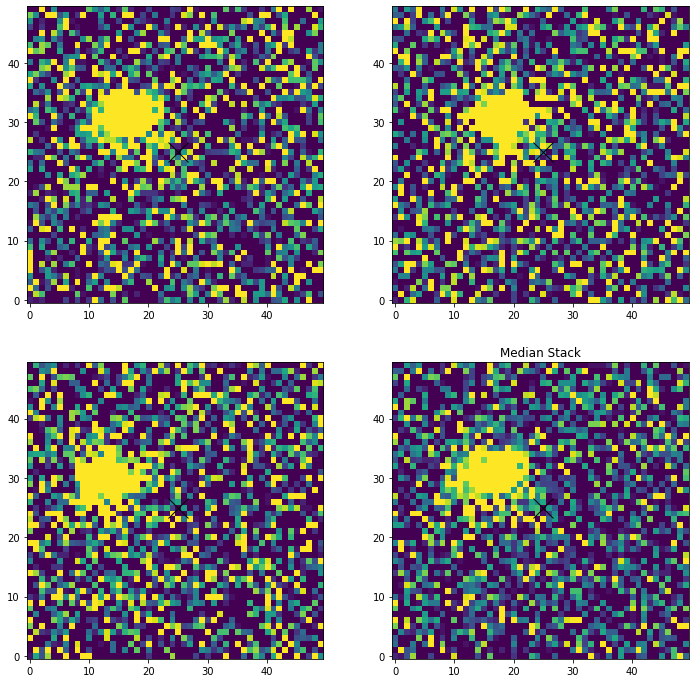

In [30]:
# I images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m1_flat_I_darksub_biassub[ii][40:90, 620:670], origin='lower', vmax=50, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_I_median_combined_images[40:90, 620:670], origin='lower', vmax=50, vmin=30)
ax.plot(25, 25, 'kx', markersize=20)
ax.set_title("Median Stack")

In [31]:
iim0 = np.roll(np.roll(m1_flat_I_darksub_biassub[0], -6, axis=0), 8, axis=1)
iim1 = np.roll(np.roll(m1_flat_I_darksub_biassub[1], -5, axis=0), 6, axis=1)
iim2 = np.roll(np.roll(m1_flat_I_darksub_biassub[2], -5, axis=0), 12, axis=1)
i_rolled_images = [iim0,iim1,iim2]
i_rolled_median = np.median(i_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

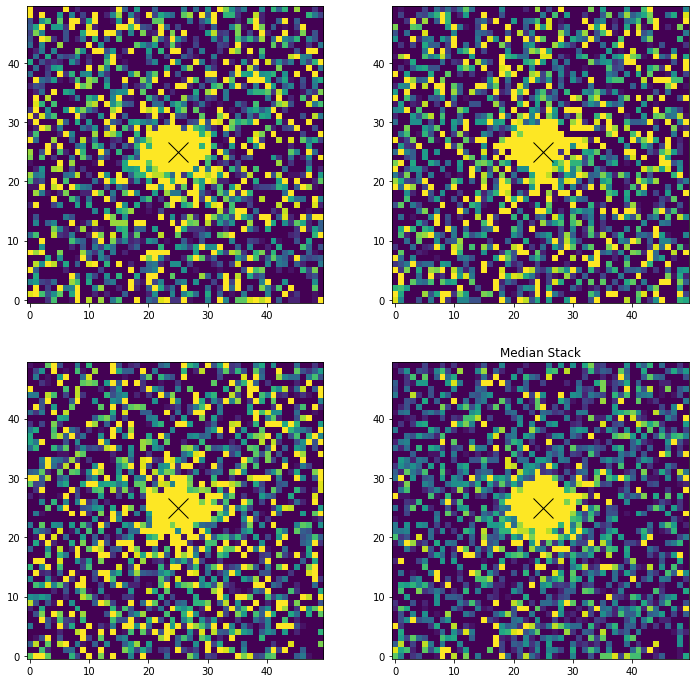

In [32]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(i_rolled_images[ii][40:90, 620:670], origin='lower', vmax=50, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(i_rolled_median[40:90, 620:670], origin='lower', vmax=50, vmin=30)
ax.plot(25, 25, 'kx', markersize=20)
ax.set_title("Median Stack")

In [33]:
m1_b_median_uncertainty = m1_b_flatdiv_uncertainty_percent * np.std(b_rolled_median)
m1_v_median_uncertainty = m1_v_flatdiv_uncertainty_percent * np.std(v_rolled_median)
m1_i_median_uncertainty = m1_i_flatdiv_uncertainty_percent * np.std(i_rolled_median)

stacked_uncertainty = m1_b_median_uncertainty + m1_v_median_uncertainty + m1_i_median_uncertainty
mean_stacked_uncertainty = np.mean(stacked_uncertainty)
mean_stacked_uncertainty

30.888015421784505

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


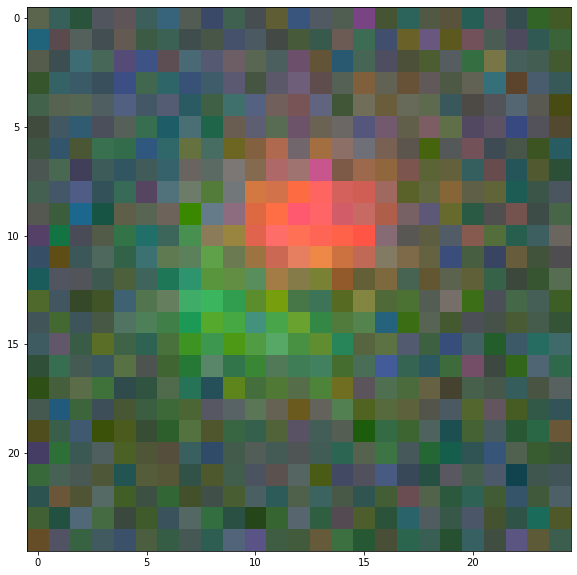

In [34]:
pl.figure(figsize=(14, 10))
red = i_rolled_median[100:125, 450:475]*0.008
green = v_rolled_median[100:125, 450:475]*0.004
blue = b_rolled_median[100:125, 450:475]*0.009
plt.imshow(np.dstack([red, green, blue]))

In [35]:
fim0 = np.roll(np.roll(i_rolled_median, 5, axis=0), -3, axis=1)
fim1 = np.roll(np.roll(v_rolled_median, 0, axis=0), 0, axis=1)
fim2 = np.roll(np.roll(b_rolled_median, 0, axis=0), 0, axis=1)
f_rolled_images = [fim0,fim1,fim2]

In [36]:
for i in range(0, 509):
    imrow = fim1[i]
    for i in range(0, 764):
        pixel = imrow[i]
        if pixel<200:
            pixel == 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


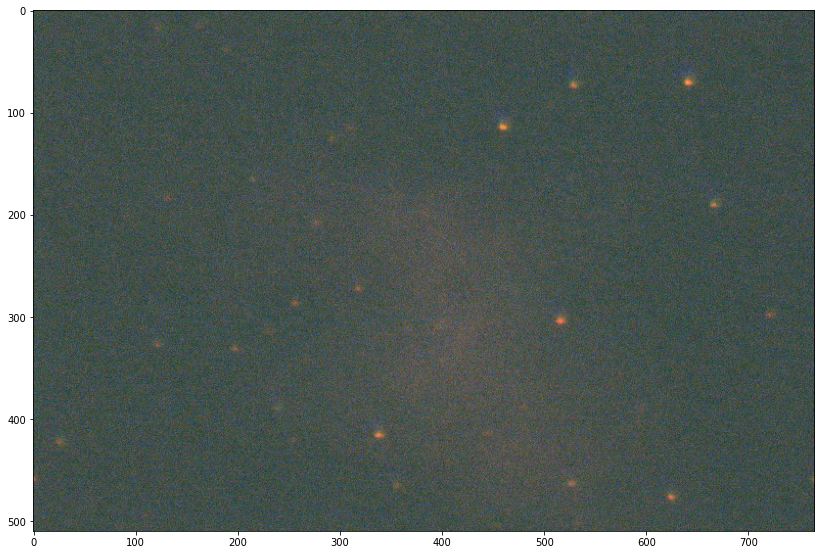

In [37]:
pl.figure(figsize=(14, 10))
red = fim0*0.008
green = fim1*0.00355
blue = fim2*0.009
plt.imshow(np.dstack([red, green, blue]))

In [38]:
i_rolled_median[110, 463] + v_rolled_median[113, 460] + b_rolled_median[111, 462]

322.9121080805462

### Observing Night 2: 2/9/2022

From this night, I will analyze the data for M45, the Pleiades cluster.

In [39]:
m45_dark_file_list = glob.glob("dark_20s*FIT")
m45_dark_timeseries = np.array([fits.getdata(fn) for fn in m45_dark_file_list])
m45_median_dark = np.median(m45_dark_timeseries, axis=0)
m45_dark_std = m45_dark_timeseries.std(axis=0, ddof=1)
m45_mean_dark_noise = np.mean(m45_dark_std)
print("The mean dark noise across all the darks is", m45_mean_dark_noise)

The mean dark noise across all the darks is 11.846924771681529


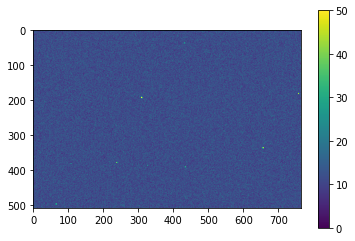

In [40]:
pl.imshow(m45_dark_std, vmin=0, vmax=50)
pl.colorbar()

In [41]:
# M45 Image Files
m45_B_file_list = glob.glob("m45_filterB*FIT")
m45_V_file_list = glob.glob("m45_filterV*FIT")
m45_I_file_list = glob.glob("m45_filterI*FIT")

In [42]:
m45_B_data = np.array([fits.getdata(fn) for fn in m45_B_file_list])
m45_V_data = np.array([fits.getdata(fn) for fn in m45_V_file_list])
m45_I_data = np.array([fits.getdata(fn) for fn in m45_I_file_list])

In [43]:
m45_B_nodark = m45_B_data - m45_median_dark
m45_V_nodark = m45_V_data - m45_median_dark
m45_I_nodark = m45_I_data - m45_median_dark

In [44]:
# Flat Files
m45_flatB = glob.glob("twilight_FilterB*FIT")
m45_flatV = glob.glob("twilight_FilterV*FIT")
m45_flatI = glob.glob("twilight_FilterI*FIT")

In [45]:
m45_flatB_data = np.array([fits.getdata(fn) for fn in m45_flatB])
m45_flatV_data = np.array([fits.getdata(fn) for fn in m45_flatV])
m45_flatI_data = np.array([fits.getdata(fn) for fn in m45_flatI])

In [46]:
m45_flatB_mean = m45_flatB_data.mean()
m45_flatV_mean = m45_flatV_data.mean()
m45_flatI_mean = m45_flatI_data.mean()

In [47]:
m45_flatB_mean_darksub = m45_flatB_mean - m45_median_dark
m45_flatV_mean_darksub = m45_flatV_mean - m45_median_dark
m45_flatI_mean_darksub = m45_flatI_mean - m45_median_dark

In [48]:
m45_b_uncertainty_image = m45_flatB_data.std(axis=0, ddof=1) + m45_dark_std
m45_v_uncertainty_image = m45_flatV_data.std(axis=0, ddof=1) + m45_dark_std
m45_i_uncertainty_image = m45_flatI_data.std(axis=0, ddof=1) + m45_dark_std

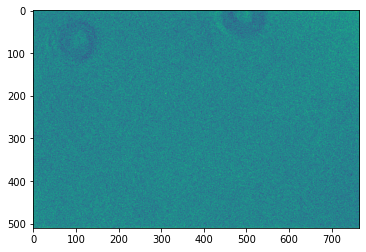

In [49]:
pl.imshow(m45_b_uncertainty_image)

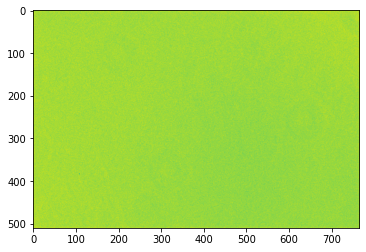

In [50]:
pl.imshow(m45_v_uncertainty_image)

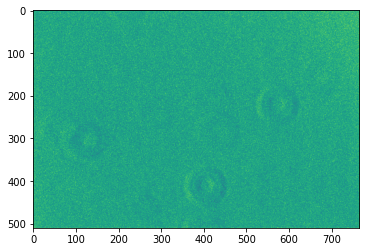

In [51]:
pl.imshow(m45_i_uncertainty_image)

In [52]:
# Normalizing flats
m45_flatB_mean_darksub_norm = m45_flatB_mean_darksub / m45_flatB_mean_darksub.mean()
m45_flatV_mean_darksub_norm = m45_flatV_mean_darksub / m45_flatV_mean_darksub.mean()
m45_flatI_mean_darksub_norm = m45_flatI_mean_darksub / m45_flatI_mean_darksub.mean()

In [53]:
m45_flatB_noise = m45_flatB_mean_darksub_norm.std(axis=0, ddof=1)
m45_flatV_noise = m45_flatV_mean_darksub_norm.std(axis=0, ddof=1)
m45_flatI_noise = m45_flatI_mean_darksub_norm.std(axis=0, ddof=1)

In [54]:
# Saving final flats to new FITS files
#hdu = fits.PrimaryHDU(m45_flatB_mean_darksub_norm)
#hdu.writeto('m45_flatB_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m45_flatV_mean_darksub_norm)
#hdu.writeto('m45_flatV_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m45_flatI_mean_darksub_norm)
#hdu.writeto('m45_flatI_mean_darksub_norm.FIT')

# DO NOT RUN MORE THAN ONCE!!!!!!!!!

In [55]:
m45_flat_B_darksub_biassub = [im / m45_flatB_mean_darksub_norm for im in m45_B_nodark]
m45_flat_V_darksub_biassub = [im / m45_flatV_mean_darksub_norm for im in m45_V_nodark]
m45_flat_I_darksub_biassub = [im / m45_flatI_mean_darksub_norm for im in m45_I_nodark]

In [56]:
#error propagation
m45_b_uncertainty_percent = m45_b_uncertainty_image / m45_b_uncertainty_image.mean()
m45_v_uncertainty_percent = m45_v_uncertainty_image / m45_v_uncertainty_image.mean()
m45_i_uncertainty_percent = m45_i_uncertainty_image / m45_i_uncertainty_image.mean()

m45_flat_B_uncertainty_percent = np.std(m45_flatB_mean_darksub_norm) / np.mean(m45_flatB_mean_darksub_norm)
m45_flat_V_uncertainty_percent = np.std(m45_flatB_mean_darksub_norm) / np.mean(m45_flatB_mean_darksub_norm)
m45_flat_I_uncertainty_percent = np.std(m45_flatB_mean_darksub_norm) / np.mean(m45_flatB_mean_darksub_norm)

m45_b_flatdiv_uncertainty_percent = m45_b_uncertainty_percent + m45_flat_B_uncertainty_percent
m45_v_flatdiv_uncertainty_percent = m45_v_uncertainty_percent + m45_flat_V_uncertainty_percent
m45_i_flatdiv_uncertainty_percent = m45_i_uncertainty_percent + m45_flat_I_uncertainty_percent

m45_b_flatdiv_uncertainty = m45_b_flatdiv_uncertainty_percent * np.mean(m45_flat_B_darksub_biassub)
m45_v_flatdiv_uncertainty = m45_v_flatdiv_uncertainty_percent * np.mean(m45_flat_V_darksub_biassub)
m45_i_flatdiv_uncertainty = m45_i_flatdiv_uncertainty_percent * np.mean(m45_flat_I_darksub_biassub)

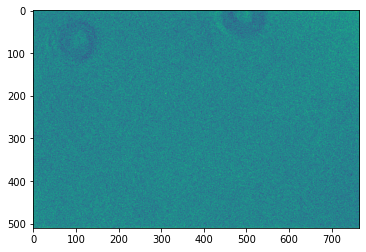

In [57]:
pl.imshow(m45_b_flatdiv_uncertainty)

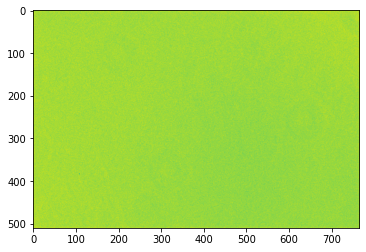

In [58]:
pl.imshow(m45_v_flatdiv_uncertainty)

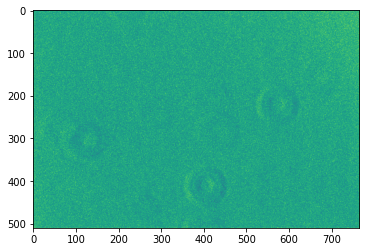

In [59]:
pl.imshow(m45_i_flatdiv_uncertainty)

In [60]:
processed_B_median_combined_images = np.median(m45_flat_B_darksub_biassub, axis=0)
processed_V_median_combined_images = np.median(m45_flat_V_darksub_biassub, axis=0)
processed_I_median_combined_images = np.median(m45_flat_I_darksub_biassub, axis=0)

Text(0.5, 1.0, 'Median Stack')

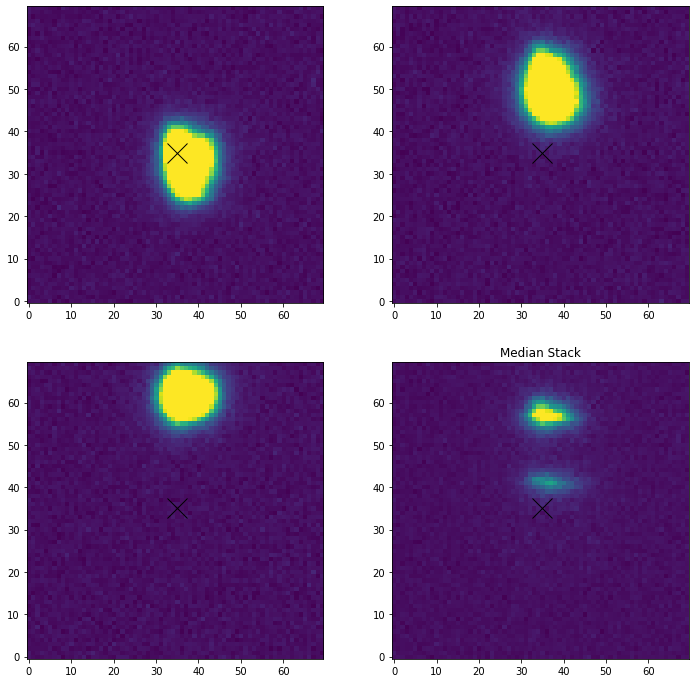

In [61]:
# B images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m45_flat_B_darksub_biassub[ii][380:450, 230:300], origin='lower', vmax=1000, vmin=30)
    ax.plot(35, 35, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_B_median_combined_images[380:450, 230:300], origin='lower', vmax=1000, vmin=30)
ax.plot(35, 35, 'kx', markersize=20)
ax.set_title("Median Stack")

In [62]:
bim0 = np.roll(np.roll(m45_flat_B_darksub_biassub[0], 2, axis=0), -3, axis=1)
bim1 = np.roll(np.roll(m45_flat_B_darksub_biassub[1], -15, axis=0), -2, axis=1)
bim2 = np.roll(np.roll(m45_flat_B_darksub_biassub[2], -27, axis=0), 0, axis=1)
b_rolled_images = [bim0,bim1,bim2]
b_rolled_median = np.median(b_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

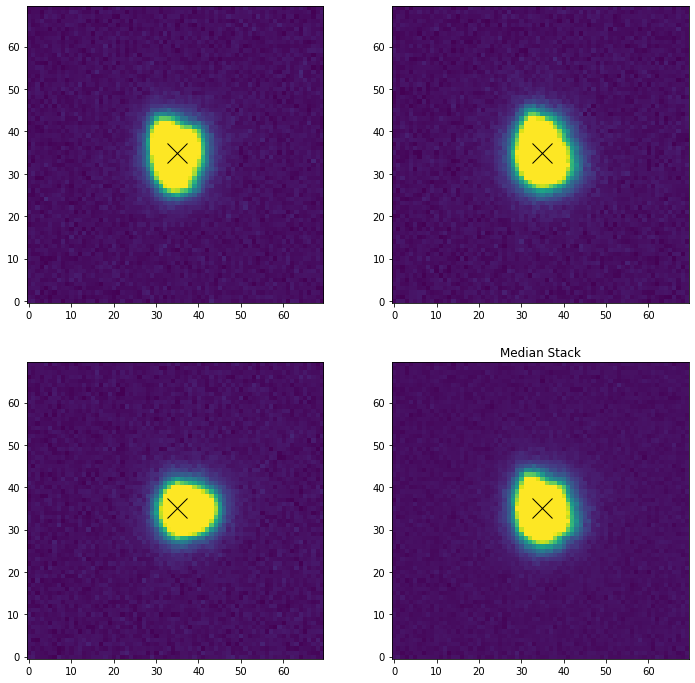

In [63]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(b_rolled_images[ii][380:450, 230:300], origin='lower', vmax=1000, vmin=30)
    ax.plot(35, 35, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(b_rolled_median[380:450, 230:300], origin='lower', vmax=1000, vmin=30)
ax.plot(35, 35, 'kx', markersize=20)
ax.set_title("Median Stack")

Text(0.5, 1.0, 'Median Stack')

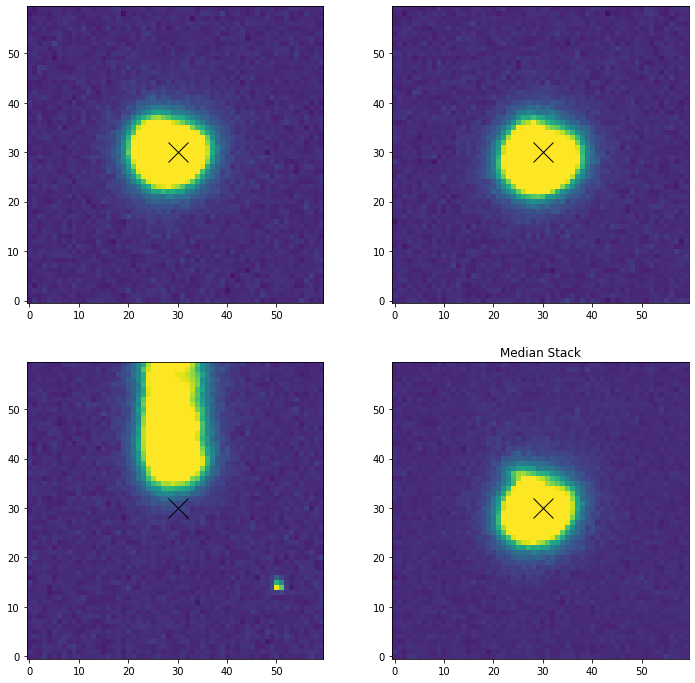

In [64]:
## V images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m45_flat_V_darksub_biassub[ii][390:450, 300:360], origin='lower', vmax=1000, vmin=30)
    ax.plot(30, 30, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_V_median_combined_images[390:450, 300:360], origin='lower', vmax=1000, vmin=30)
ax.plot(30, 30, 'kx', markersize=20)
ax.set_title("Median Stack")

In [65]:
vim0 = np.roll(np.roll(m45_flat_V_darksub_biassub[0], 0, axis=0), 1, axis=1)
vim1 = np.roll(np.roll(m45_flat_V_darksub_biassub[1], 1, axis=0), 0, axis=1)
vim2 = np.roll(np.roll(m45_flat_V_darksub_biassub[2], -11, axis=0), 0, axis=1)
v_rolled_images = [vim0,vim1,vim2]
v_rolled_median = np.median(v_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

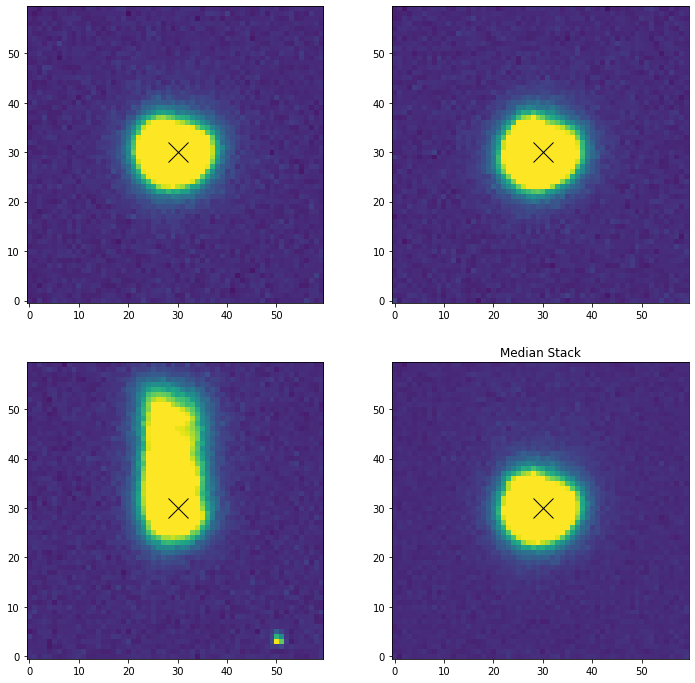

In [66]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(v_rolled_images[ii][390:450, 300:360], origin='lower', vmax=1000, vmin=30)
    ax.plot(30, 30, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(v_rolled_median[390:450, 300:360], origin='lower', vmax=1000, vmin=30)
ax.plot(30, 30, 'kx', markersize=20)
ax.set_title("Median Stack")

Text(0.5, 1.0, 'Median Stack')

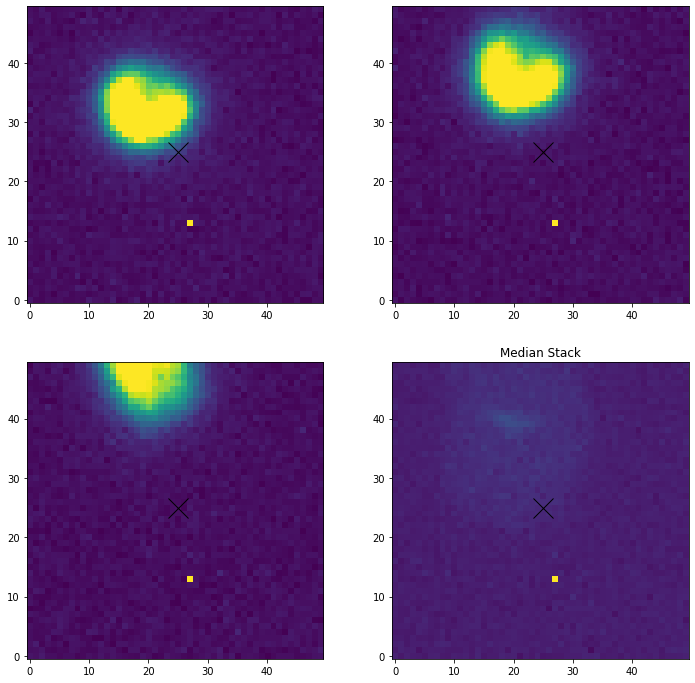

In [67]:
# I images:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(m45_flat_I_darksub_biassub[ii][375:425, 300:350], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(processed_I_median_combined_images[375:425, 300:350], origin='lower', vmax=1000, vmin=30)
ax.plot(25, 25, 'kx', markersize=20)
ax.set_title("Median Stack")

In [68]:
iim0 = np.roll(np.roll(m45_flat_I_darksub_biassub[0], -6, axis=0), 5, axis=1)
iim1 = np.roll(np.roll(m45_flat_I_darksub_biassub[1], -12, axis=0), 5, axis=1)
iim2 = np.roll(np.roll(m45_flat_I_darksub_biassub[2], -23, axis=0), 5, axis=1)
i_rolled_images = [iim0,iim1,iim2]
i_rolled_median = np.median(i_rolled_images, axis=0)

Text(0.5, 1.0, 'Median Stack')

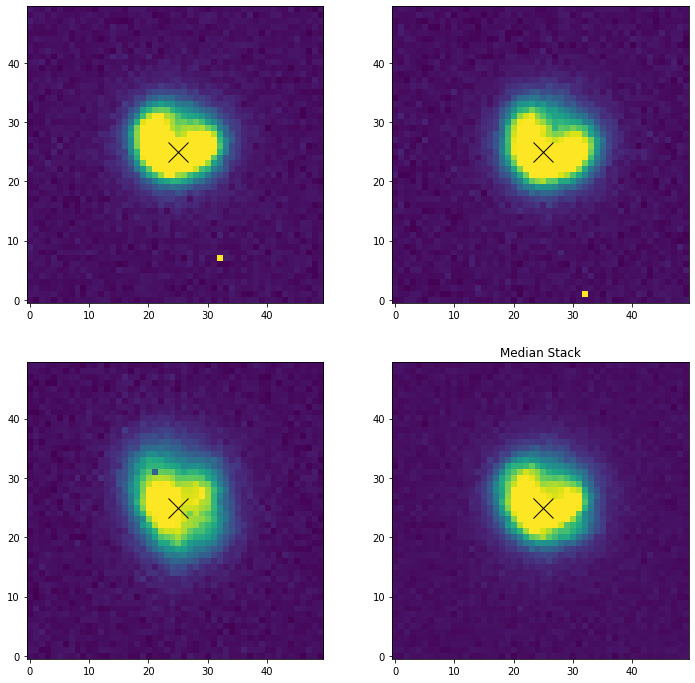

In [69]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(i_rolled_images[ii][375:425, 300:350], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
ax = pl.subplot(2,2,4)
ax.imshow(i_rolled_median[375:425, 300:350], origin='lower', vmax=1000, vmin=30)
ax.plot(25, 25, 'kx', markersize=20)
ax.set_title("Median Stack")

In [70]:
m45_b_median_uncertainty = m45_b_flatdiv_uncertainty_percent * np.std(b_rolled_median)
m45_v_median_uncertainty = m45_v_flatdiv_uncertainty_percent * np.std(v_rolled_median)
m45_i_median_uncertainty = m45_i_flatdiv_uncertainty_percent * np.std(i_rolled_median)

stacked_uncertainty = m45_b_median_uncertainty + m45_v_median_uncertainty + m45_i_median_uncertainty
mean_stacked_uncertainty = np.mean(stacked_uncertainty)
mean_stacked_uncertainty

7205.2273479576115

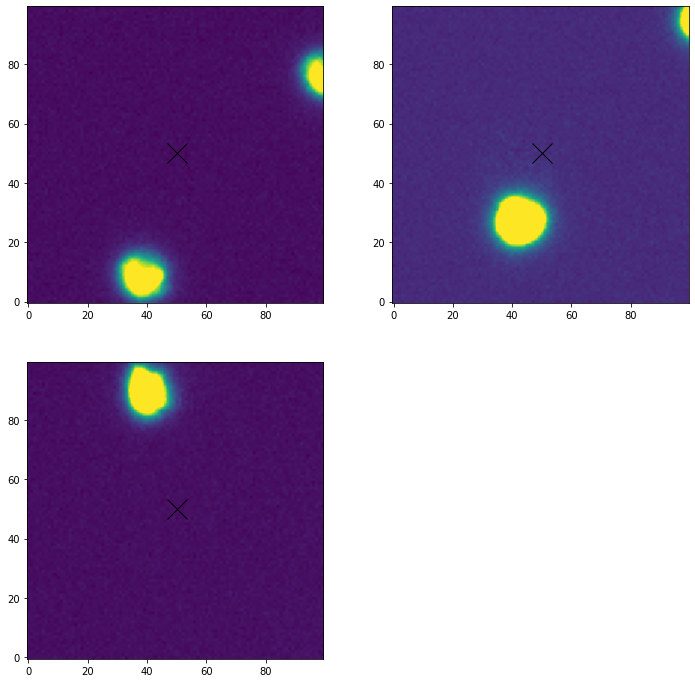

In [71]:
pl.figure(figsize=(12,12))
rolled_medians_list = [i_rolled_median, v_rolled_median, b_rolled_median]
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(rolled_medians_list[ii][325:425, 225:325], origin='lower', vmax=1000, vmin=30)
    ax.plot(50, 50, 'kx', markersize=20)

In [72]:
fim0 = np.roll(np.roll(i_rolled_median, -10, axis=0), -40, axis=1)
fim1 = np.roll(np.roll(v_rolled_median, -28, axis=0), -44, axis=1)
fim2 = np.roll(np.roll(b_rolled_median, -90, axis=0), -41, axis=1)
f_rolled_images = [fim0,fim1,fim2]

In [73]:
np.shape(v_rolled_median)

(510, 765)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


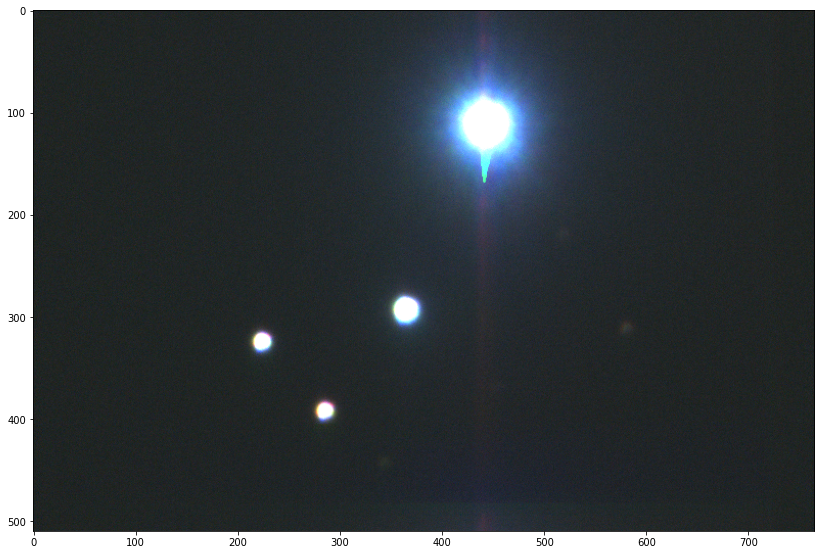

In [74]:
pl.figure(figsize=(14, 10))
red = fim0*0.002
green = fim1*0.001
blue = fim2*0.00225
plt.imshow(np.dstack([red, green, blue]))

In [75]:
i_rolled_median[335, 265] + v_rolled_median[355, 265] + b_rolled_median[415, 265]

9991.57817303792

### Observing Night 3: 2/23/2022

From this night, I will analyze the data for M42, the Orion Nebula.

In [76]:
m42_dark_file_list = glob.glob("dark_2_23_10*FIT")
m42_dark_timeseries = np.array([fits.getdata(fn) for fn in m42_dark_file_list])
m42_median_dark = np.median(m42_dark_timeseries, axis=0)
m42_dark_std = m42_dark_timeseries.std(axis=0, ddof=1)
m42_mean_dark_noise = np.mean(m42_dark_std)
print("The mean dark noise across all the darks is", m42_mean_dark_noise)

The mean dark noise across all the darks is 10.749565367809128


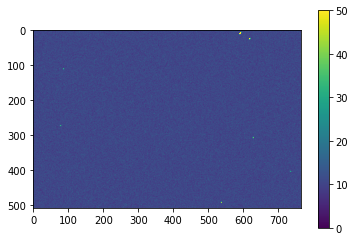

In [77]:
pl.imshow(m42_dark_std, vmin=0, vmax=50)
pl.colorbar()

In [78]:
# M42 Image Files
m42_B_file_list = glob.glob("m42_2_23_B*FIT")
m42_V_file_list = glob.glob("m42_2_23_V*FIT")
m42_I_file_list = glob.glob("m42_2_23_I*FIT")

In [79]:
m42_B_data = np.array([fits.getdata(fn) for fn in m42_B_file_list])
m42_V_data = np.array([fits.getdata(fn) for fn in m42_V_file_list])
m42_I_data = np.array([fits.getdata(fn) for fn in m42_I_file_list])

In [80]:
m42_B_nodark = m42_B_data - m42_median_dark
m42_V_nodark = m42_V_data - m42_median_dark
m42_I_nodark = m42_I_data - m42_median_dark

In [81]:
# Flat Files
m42_flatB = glob.glob("twilight_2_23_B*FIT")
m42_flatV = glob.glob("twilight_2_23_V*FIT")
m42_flatI = glob.glob("twilight_2_23_I*FIT")

In [82]:
m42_flatB_data = np.array([fits.getdata(fn) for fn in m42_flatB])
m42_flatV_data = np.array([fits.getdata(fn) for fn in m42_flatV])
m42_flatI_data = np.array([fits.getdata(fn) for fn in m42_flatI])

In [83]:
m42_flatB_mean = m42_flatB_data.mean()
m42_flatV_mean = m42_flatV_data.mean()
m42_flatI_mean = m42_flatI_data.mean()

In [84]:
m42_flatB_mean_darksub = m42_flatB_mean - m42_median_dark
m42_flatV_mean_darksub = m42_flatV_mean - m42_median_dark
m42_flatI_mean_darksub = m42_flatI_mean - m42_median_dark

In [85]:
m42_b_uncertainty_image = m42_flatB_data.std(axis=0, ddof=1) + m42_dark_std
m42_v_uncertainty_image = m42_flatV_data.std(axis=0, ddof=1) + m42_dark_std
m42_i_uncertainty_image = m42_flatI_data.std(axis=0, ddof=1) + m42_dark_std

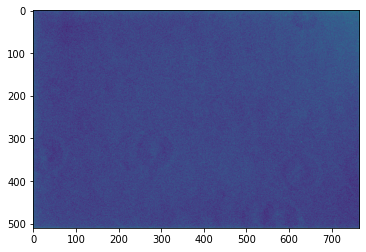

In [86]:
pl.imshow(m42_b_uncertainty_image)

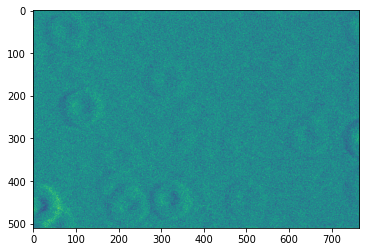

In [87]:
pl.imshow(m42_v_uncertainty_image)

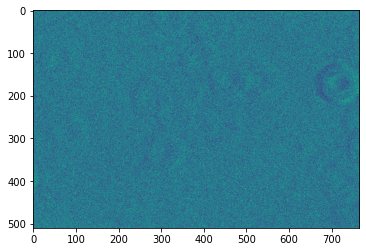

In [88]:
pl.imshow(m42_i_uncertainty_image)

In [89]:
# Normalizing flats
m42_flatB_mean_darksub_norm = m42_flatB_mean_darksub / m42_flatB_mean_darksub.mean()
m42_flatV_mean_darksub_norm = m42_flatV_mean_darksub / m42_flatV_mean_darksub.mean()
m42_flatI_mean_darksub_norm = m42_flatI_mean_darksub / m42_flatI_mean_darksub.mean()

In [90]:
m42_flatB_noise = m42_flatB_mean_darksub_norm.std(axis=0, ddof=1)
m42_flatV_noise = m42_flatV_mean_darksub_norm.std(axis=0, ddof=1)
m42_flatI_noise = m42_flatI_mean_darksub_norm.std(axis=0, ddof=1)

In [91]:
# Saving final flats to new FITS files
#hdu = fits.PrimaryHDU(m42_flatB_mean_darksub_norm)
#hdu.writeto('m42_flatB_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m42_flatV_mean_darksub_norm)
#hdu.writeto('m42_flatV_mean_darksub_norm.FIT')

#hdu = fits.PrimaryHDU(m42_flatI_mean_darksub_norm)
#hdu.writeto('m42_flatI_mean_darksub_norm.FIT')

# DO NOT RUN MORE THAN ONCE!!!!!!!!!

In [92]:
m42_flat_B_darksub_biassub = [im / m42_flatB_mean_darksub_norm for im in m42_B_nodark]
m42_flat_V_darksub_biassub = [im / m42_flatV_mean_darksub_norm for im in m42_V_nodark]
m42_flat_I_darksub_biassub = [im / m42_flatI_mean_darksub_norm for im in m42_I_nodark]

In [93]:
#error propagation
m42_b_uncertainty_percent = m42_b_uncertainty_image / m42_b_uncertainty_image.mean()
m42_v_uncertainty_percent = m42_v_uncertainty_image / m42_v_uncertainty_image.mean()
m42_i_uncertainty_percent = m42_i_uncertainty_image / m42_i_uncertainty_image.mean()

m42_flat_B_uncertainty_percent = np.std(m42_flatB_mean_darksub_norm) / np.mean(m42_flatB_mean_darksub_norm)
m42_flat_V_uncertainty_percent = np.std(m42_flatB_mean_darksub_norm) / np.mean(m42_flatB_mean_darksub_norm)
m42_flat_I_uncertainty_percent = np.std(m42_flatB_mean_darksub_norm) / np.mean(m42_flatB_mean_darksub_norm)

m42_b_flatdiv_uncertainty_percent = m42_b_uncertainty_percent + m42_flat_B_uncertainty_percent
m42_v_flatdiv_uncertainty_percent = m42_v_uncertainty_percent + m42_flat_V_uncertainty_percent
m42_i_flatdiv_uncertainty_percent = m42_i_uncertainty_percent + m42_flat_I_uncertainty_percent

m42_b_flatdiv_uncertainty = m42_b_flatdiv_uncertainty_percent * np.mean(m42_flat_B_darksub_biassub)
m42_v_flatdiv_uncertainty = m42_v_flatdiv_uncertainty_percent * np.mean(m42_flat_V_darksub_biassub)
m42_i_flatdiv_uncertainty = m42_i_flatdiv_uncertainty_percent * np.mean(m42_flat_I_darksub_biassub)

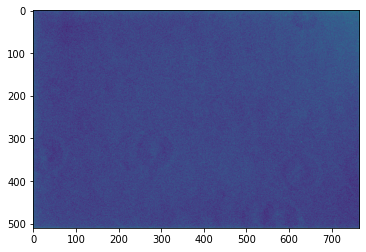

In [94]:
pl.imshow(m42_b_flatdiv_uncertainty)

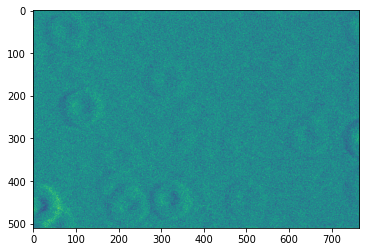

In [95]:
pl.imshow(m42_v_flatdiv_uncertainty)

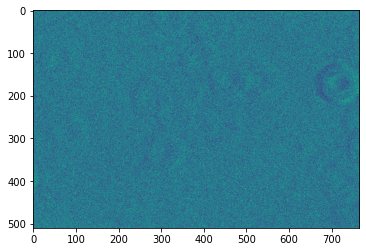

In [96]:
pl.imshow(m42_i_flatdiv_uncertainty)

In [97]:
processed_B_median_combined_images = np.median(m42_flat_B_darksub_biassub, axis=0)
processed_V_median_combined_images = np.median(m42_flat_V_darksub_biassub, axis=0)
processed_I_median_combined_images = np.median(m42_flat_I_darksub_biassub, axis=0)

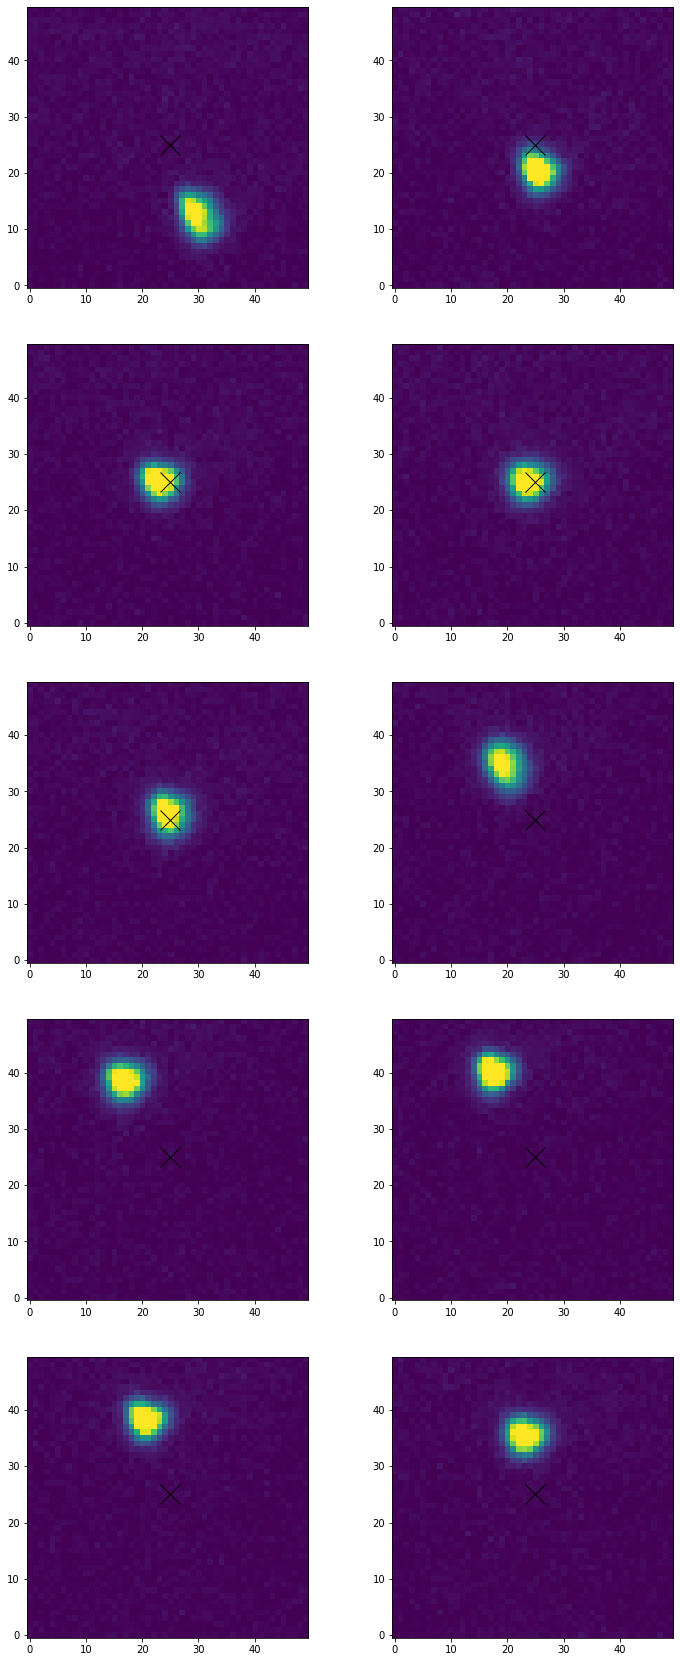

In [98]:
# B images:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(m42_flat_B_darksub_biassub[ii][25:75, 160:210], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
#ax = pl.subplot(6,1,6)
#ax.imshow(processed_B_median_combined_images[25:75, 160:210], origin='lower', vmax=1000, vmin=30)
#ax.plot(35, 35, 'kx', markersize=20)
#ax.set_title("Median Stack")

In [99]:
bim0 = np.roll(np.roll(m42_flat_B_darksub_biassub[0], 12, axis=0), -4, axis=1)
bim1 = np.roll(np.roll(m42_flat_B_darksub_biassub[1], 5, axis=0), 0, axis=1)
bim2 = np.roll(np.roll(m42_flat_B_darksub_biassub[2], 0, axis=0), 2, axis=1)
bim3 = np.roll(np.roll(m42_flat_B_darksub_biassub[3], 0, axis=0), 1, axis=1)
bim4 = np.roll(np.roll(m42_flat_B_darksub_biassub[4], -1, axis=0), 1, axis=1)
bim5 = np.roll(np.roll(m42_flat_B_darksub_biassub[5], -10, axis=0), 6, axis=1)
bim6 = np.roll(np.roll(m42_flat_B_darksub_biassub[6], -14, axis=0), 8, axis=1)
bim7 = np.roll(np.roll(m42_flat_B_darksub_biassub[7], -15, axis=0), 7, axis=1)
bim8 = np.roll(np.roll(m42_flat_B_darksub_biassub[8], -13, axis=0), 5, axis=1)
bim9 = np.roll(np.roll(m42_flat_B_darksub_biassub[9], -10, axis=0), 2, axis=1)
b_rolled_images = [bim0,bim1,bim2,bim3,bim4,bim5,bim6,bim7,bim8,bim9]
b_rolled_median = np.median(b_rolled_images, axis=0)

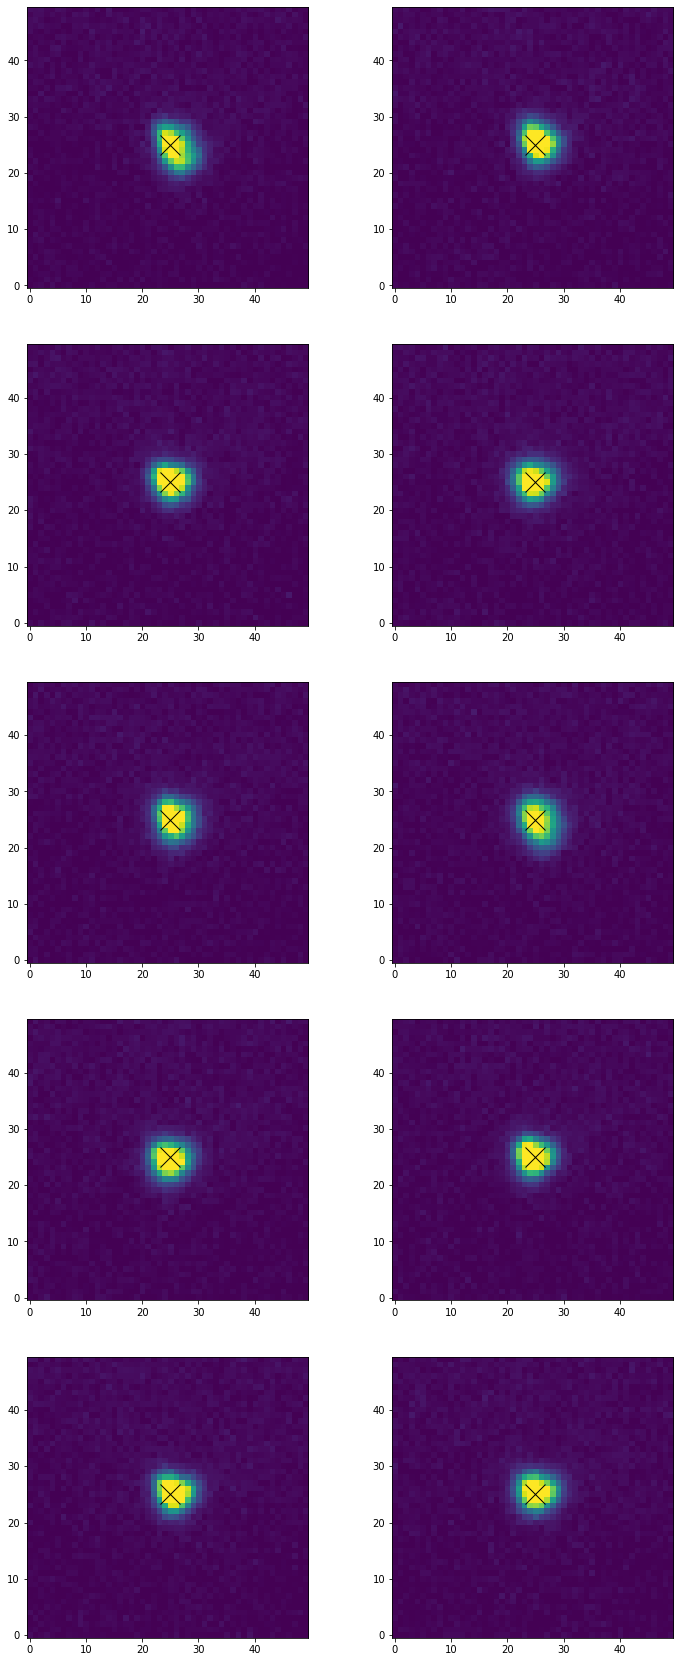

In [100]:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(b_rolled_images[ii][25:75, 160:210], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
#ax = pl.subplot(6, 1, 6)
#ax.imshow(b_rolled_median[25:75, 160:210], origin='lower', vmax=1000, vmin=30)
#ax.plot(25, 25, 'kx', markersize=20)
#ax.set_title("Median Stack")

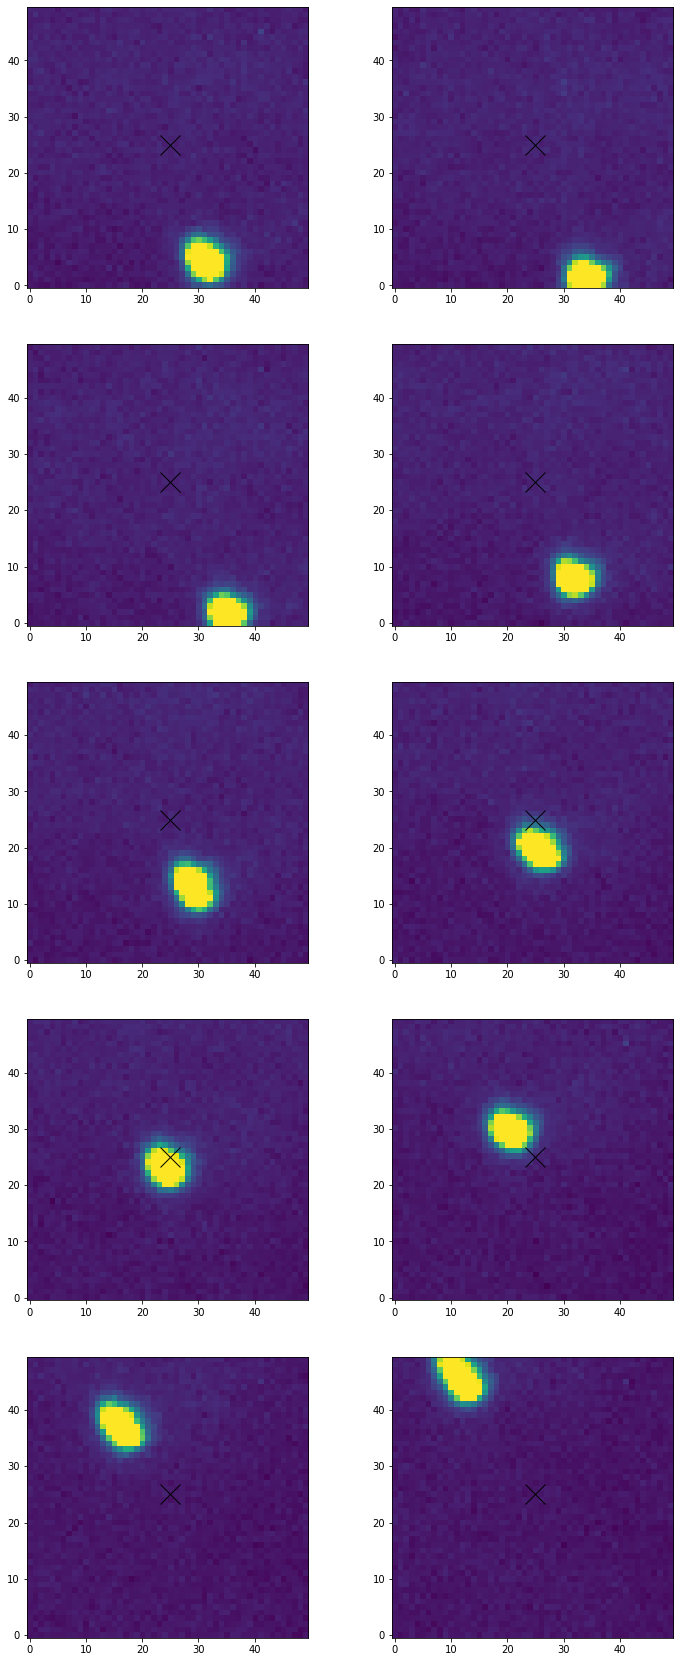

In [101]:
## V images:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(m42_flat_V_darksub_biassub[ii][60:110, 185:235], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
#ax = pl.subplot(6, 1, 6)
#ax.imshow(processed_V_median_combined_images, origin='lower', vmax=1000, vmin=30)
#ax.plot(25, 25, 'kx', markersize=20)
#ax.set_title("Median Stack")

In [102]:
vim0 = np.roll(np.roll(m42_flat_V_darksub_biassub[0], 20, axis=0), -6, axis=1)
vim1 = np.roll(np.roll(m42_flat_V_darksub_biassub[1], 23, axis=0), -9, axis=1)
vim2 = np.roll(np.roll(m42_flat_V_darksub_biassub[2], 23, axis=0), -10, axis=1)
vim3 = np.roll(np.roll(m42_flat_V_darksub_biassub[3], 17, axis=0), -7, axis=1)
vim4 = np.roll(np.roll(m42_flat_V_darksub_biassub[4], 12, axis=0), -4, axis=1)
vim5 = np.roll(np.roll(m42_flat_V_darksub_biassub[5], 5, axis=0), -1, axis=1)
vim6 = np.roll(np.roll(m42_flat_V_darksub_biassub[6], 2, axis=0), 1, axis=1)
vim7 = np.roll(np.roll(m42_flat_V_darksub_biassub[7], -5, axis=0), 5, axis=1)
vim8 = np.roll(np.roll(m42_flat_V_darksub_biassub[8], -12, axis=0), 9, axis=1)
vim9 = np.roll(np.roll(m42_flat_V_darksub_biassub[9], -20, axis=0), 13, axis=1)
v_rolled_images = [vim0,vim1,vim2,vim3,vim4,vim5,vim6,vim7,vim8,vim9]
v_rolled_median = np.median(v_rolled_images, axis=0)

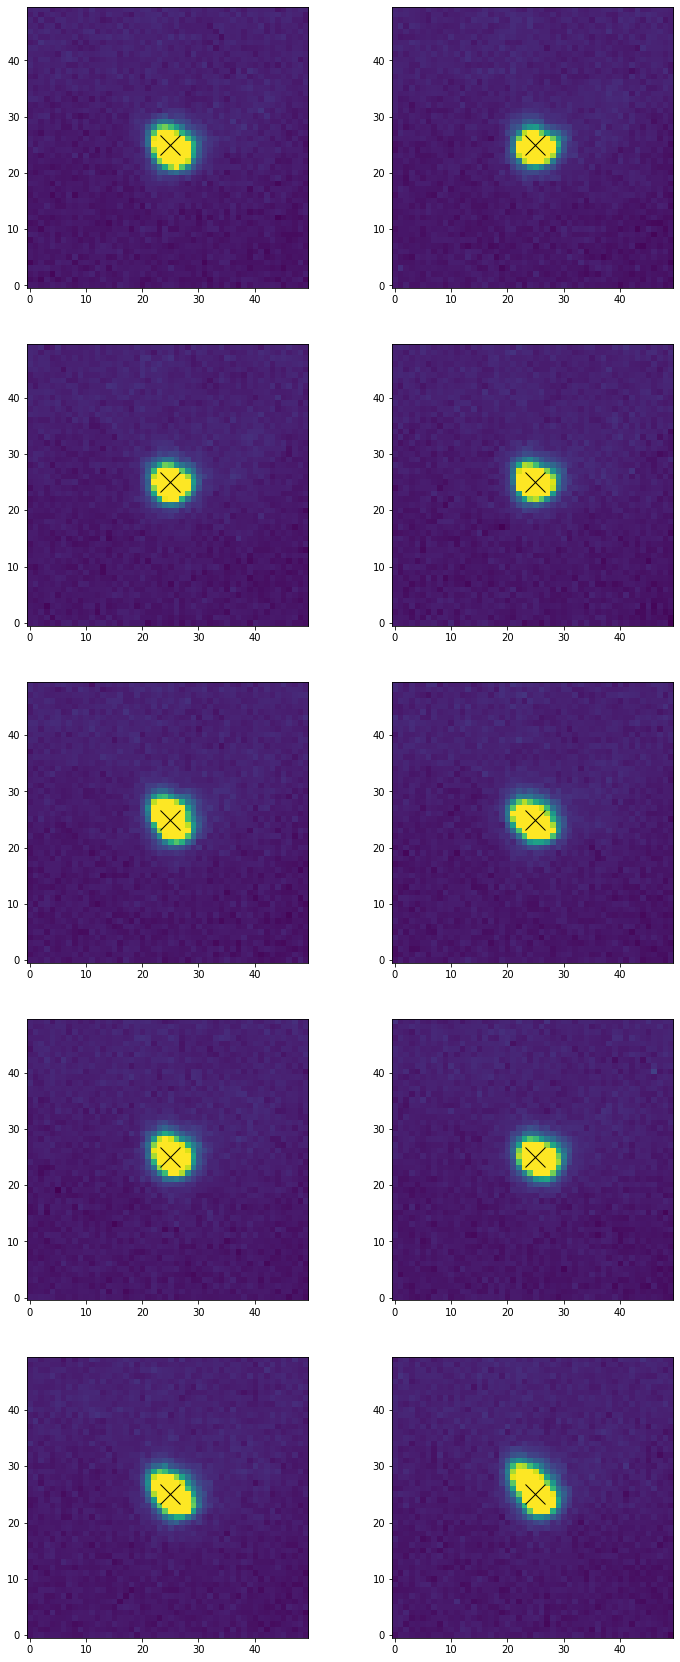

In [103]:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(v_rolled_images[ii][60:110, 185:235], origin='lower', vmax=1000, vmin=30)
    ax.plot(25, 25, 'kx', markersize=20)
#ax = pl.subplot(6,1,6)
#ax.imshow(v_rolled_median[60:110, 185:235], origin='lower', vmax=1000, vmin=30)
#ax.plot(25, 25, 'kx', markersize=20)
#ax.set_title("Median Stack")

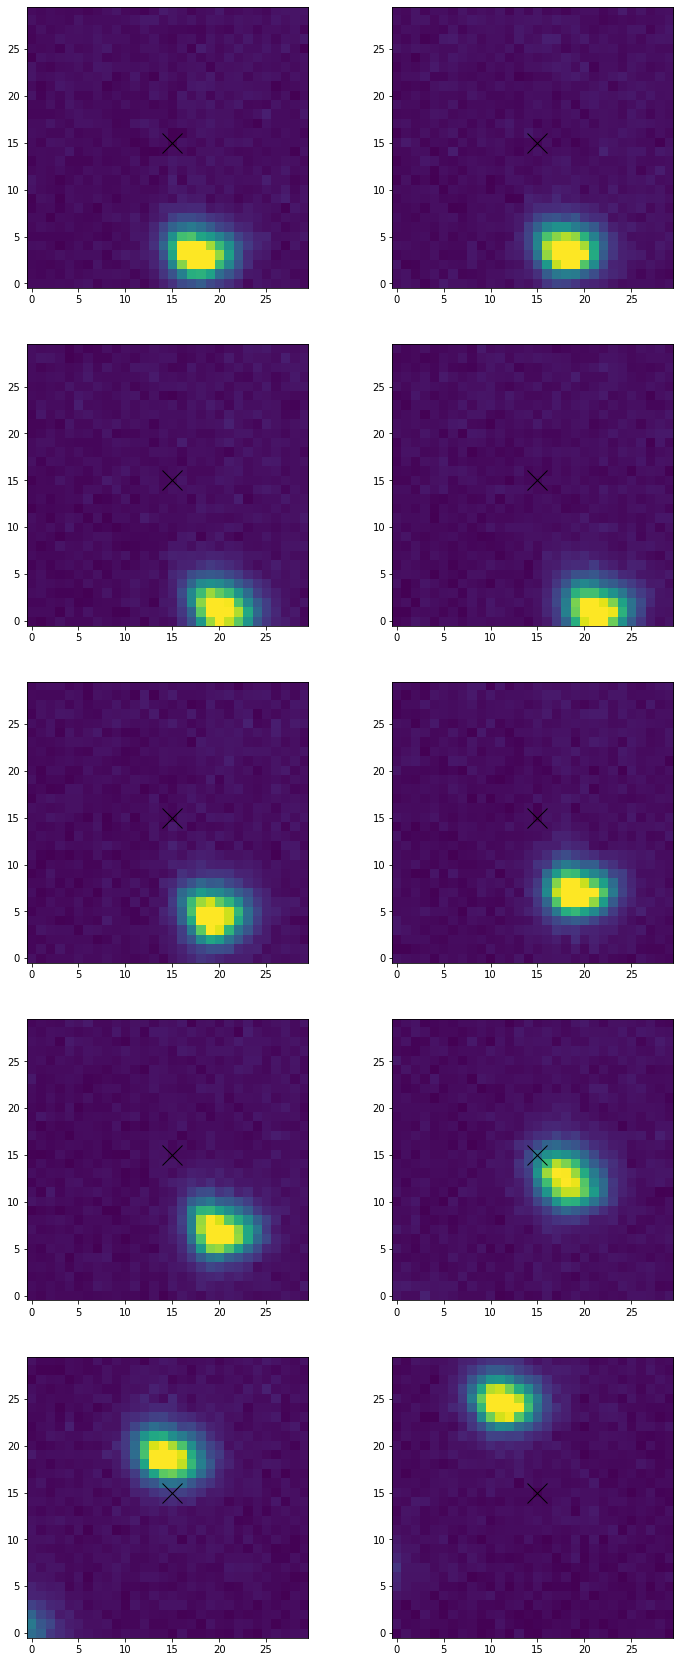

In [104]:
# I images:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(m42_flat_I_darksub_biassub[ii][75:105, 140:170], origin='lower', vmax=1000, vmin=30)
    ax.plot(15, 15, 'kx', markersize=20)
#ax = pl.subplot(6,1,6)
#ax.imshow(processed_I_median_combined_images[75:105, 140:170], origin='lower', vmax=1000, vmin=30)
#ax.plot(15, 15, 'kx', markersize=20)
#ax.set_title("Median Stack")

In [105]:
iim0 = np.roll(np.roll(m42_flat_I_darksub_biassub[0], 12, axis=0), -2, axis=1)
iim1 = np.roll(np.roll(m42_flat_I_darksub_biassub[1], 12, axis=0), -3, axis=1)
iim2 = np.roll(np.roll(m42_flat_I_darksub_biassub[2], 14, axis=0), -5, axis=1)
iim3 = np.roll(np.roll(m42_flat_I_darksub_biassub[3], 14, axis=0), -6, axis=1)
iim4 = np.roll(np.roll(m42_flat_I_darksub_biassub[4], 11, axis=0), -4, axis=1)
iim5 = np.roll(np.roll(m42_flat_I_darksub_biassub[5], 8, axis=0), -4, axis=1)
iim6 = np.roll(np.roll(m42_flat_I_darksub_biassub[6], 8, axis=0), -5, axis=1)
iim7 = np.roll(np.roll(m42_flat_I_darksub_biassub[7], 3, axis=0), -3, axis=1)
iim8 = np.roll(np.roll(m42_flat_I_darksub_biassub[8], -4, axis=0), 1, axis=1)
iim9 = np.roll(np.roll(m42_flat_I_darksub_biassub[9], -9, axis=0), 4, axis=1)
i_rolled_images = [iim0,iim1,iim2,iim3,iim4,iim5,iim6,iim7,iim8,iim9]
i_rolled_median = np.median(i_rolled_images, axis=0)

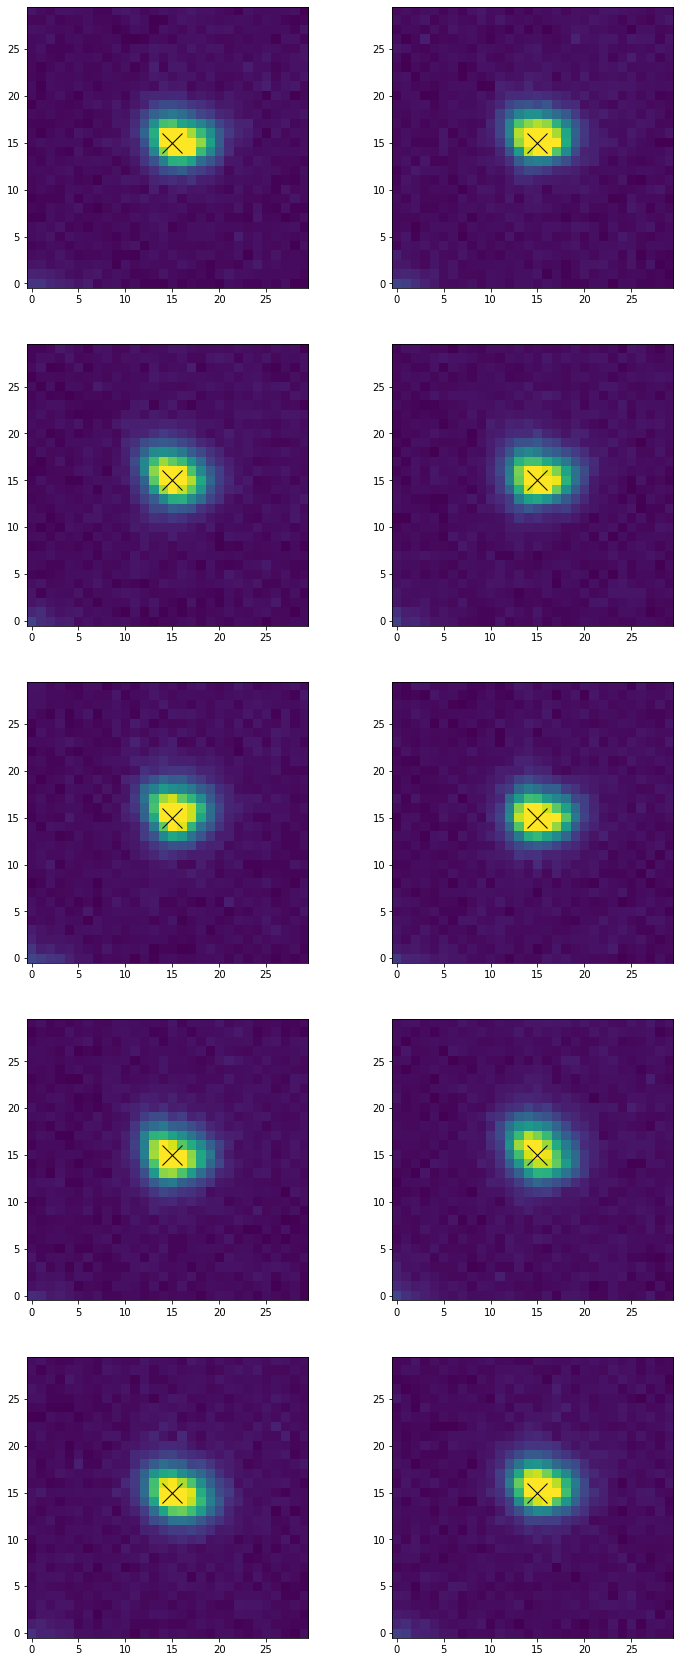

In [106]:
pl.figure(figsize=(12,30))
for ii in range(10):
    ax = pl.subplot(5,2,ii+1)
    ax.imshow(i_rolled_images[ii][75:105, 140:170], origin='lower', vmax=1000, vmin=30)
    ax.plot(15, 15, 'kx', markersize=20)
#ax = pl.subplot(6,1,6)
#ax.imshow(i_rolled_median[75:105, 140:170], origin='lower', vmax=1000, vmin=30)
#ax.plot(15, 15, 'kx', markersize=20)
#ax.set_title("Median Stack")

In [107]:
m42_b_median_uncertainty = m42_b_flatdiv_uncertainty_percent * np.std(b_rolled_median)
m42_v_median_uncertainty = m42_v_flatdiv_uncertainty_percent * np.std(v_rolled_median)
m42_i_median_uncertainty = m42_i_flatdiv_uncertainty_percent * np.std(i_rolled_median)

stacked_uncertainty = m42_b_median_uncertainty + m42_v_median_uncertainty + m42_i_median_uncertainty
mean_stacked_uncertainty = np.mean(stacked_uncertainty)
mean_stacked_uncertainty

3053.166355442672

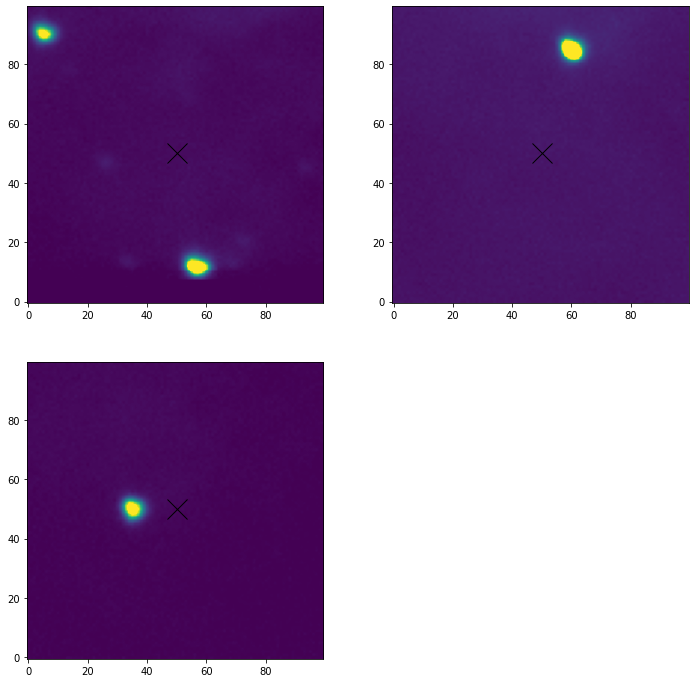

In [108]:
pl.figure(figsize=(12,12))
rolled_medians_list = [i_rolled_median, v_rolled_median, b_rolled_median]
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(rolled_medians_list[ii][0:100, 150:250], origin='lower', vmax=1000, vmin=30)
    ax.plot(50, 50, 'kx', markersize=20)

In [109]:
fim0 = np.roll(np.roll(i_rolled_median, 38, axis=0), -6, axis=1)
fim1 = np.roll(np.roll(v_rolled_median, -35, axis=0), -10, axis=1)
fim2 = np.roll(np.roll(b_rolled_median, 0, axis=0), 15, axis=1)
f_rolled_images = [fim0,fim1,fim2]

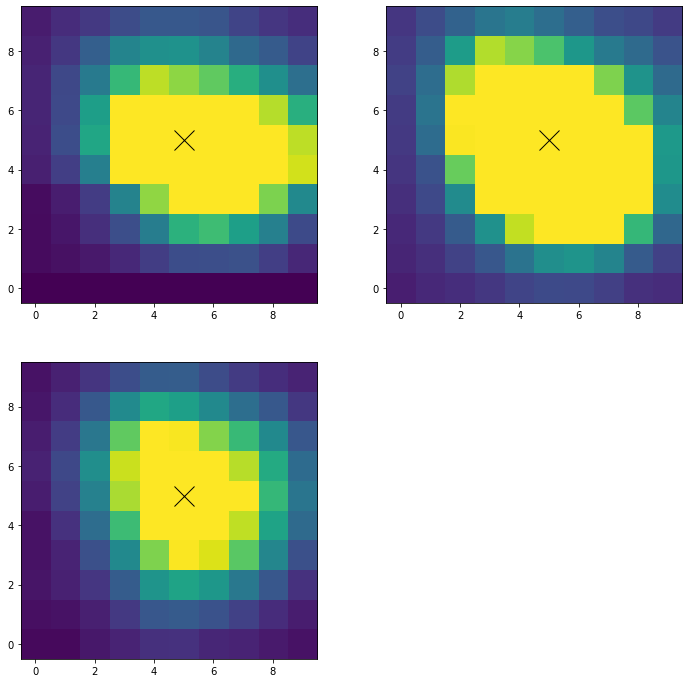

In [110]:
pl.figure(figsize=(12,12))
for ii in range(3):
    ax = pl.subplot(2,2,ii+1)
    ax.imshow(f_rolled_images[ii][45:55, 195:205], origin='lower', vmax=1000, vmin=30)
    ax.plot(5, 5, 'kx', markersize=20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


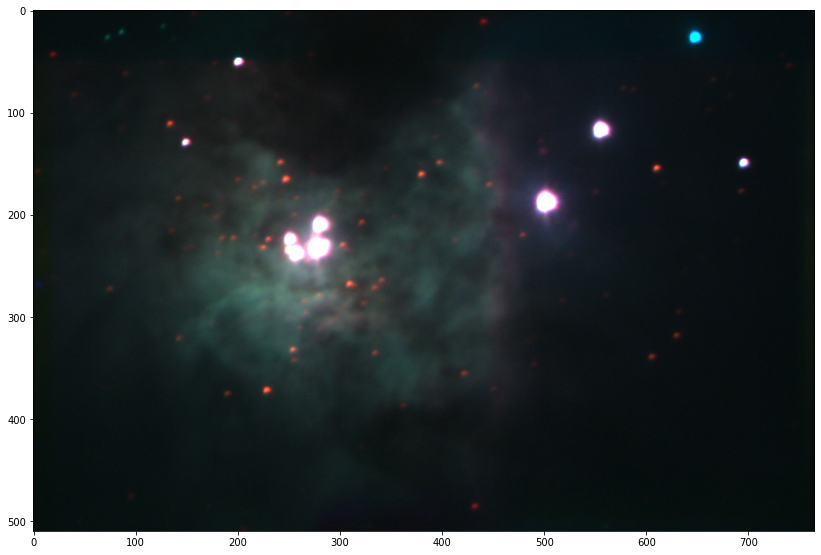

In [113]:
pl.figure(figsize=(14, 10))
red = fim0*0.002
green = fim1*0.001
blue = fim2*0.0024
plt.imshow(np.dstack([red, green, blue]))

In [112]:
fim0[50, 200] + fim1[50, 200] + fim2[50, 200]

7870.635195695446

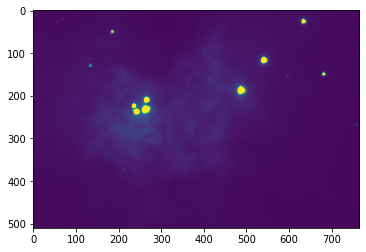

In [140]:
plt.imshow(b_rolled_median, vmin=0, vmax=1000)

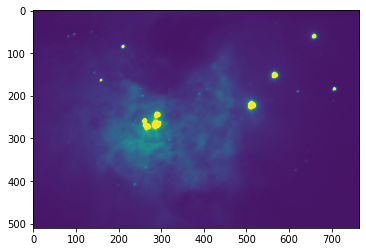

In [143]:
plt.imshow(v_rolled_median, vmin=0, vmax=1000)

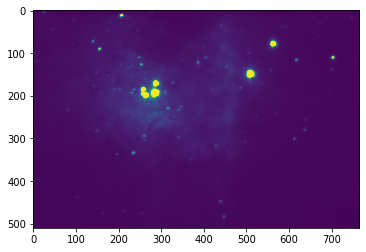

In [144]:
plt.imshow(i_rolled_median, vmin=0, vmax=1000)